# Beneficial mutations

## Expected number of beneficial mutations

Calculations at the end of section 4.1.

With the parameters used in Figures 2A and 2B $(W_0 = 10^4, r = 0.01, u = 10^{−5})$

In [1]:
run rescue_theory

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set()
sns.set_style('ticks')
sns.set_context('poster')

In [5]:
W0 = 10000
r = 0.01
u = 1e-5
K(W0, r, u)

9.890208693393525

The corresponding number for Figures 2C and 2D $(W_0 = 10^4, r = 0.01, u = 10^{−4})$ is

In [6]:
u = 1e-4
K(W0, r, u)

98.02950787206684

These numbers of mutations include mutations that occur in populations that ultimately go extinct and mutations that occur in rescued populations but disappear and do not contribute to the rescue.

## Expected number of rescuing mutations

Calculations at the end of section 5.3.

With the parameters used in Figure 2A $(W_0 = 10^4, r = 0.01, s = 0.02, u = 10^{−5})$

In [7]:
s = 0.02
u = 1e-5
KS(W0, r, s, u, 100)

1.099663503237849

The corresponding number for Figures 2B $(W_0 = 10^4, r = 0.01, s = 0.1, u = 10^{−5})$ is

In [8]:
s = 0.1
KS(W0, r, s, u, 100)

1.9897086992355932

The corresponding number for Figure 2C $(W_0 = 10^4, r = 0.01, s = 0.02, u = 10^{−4})$ is

In [9]:
s = 0.02
u = 1e-4
KS(W0, r, s, u, 100)

2.2383652403509138

The corresponding number for Figure 2D $(W_0 = 10^4, r = 0.01, s = 0.1, u = 10^{−4})$ is

In [10]:
s = 0.1
KS(W0, r, s, u, 100)

15.574325417812505

## Waiting time for the first rescuing mutation

Code to generate Figure 3 showing the effect of different parameters on the probability of rescue from new mutations, $P_\mathrm{new}(\mathcal R)$.

Illustrated for the case of Figure 1D with parameters: $W_0=10^4, B_0=0, r = 0.09, s = 0.1,$ and a range of values of $u$.

### Exact probabilities

In [44]:
s = 0.1
u = 1e-4
pp = []
p0 = 1
x = np.arange(1, 61)
for i in x:
    p1 = prob_time(W0, r, s, u, i, 100)
    pp.append(p0-p1)
    p0 = p1

### Stochastic simulations

In [2]:
run rescue_mutation_simulations

In [15]:
%%time
s = 0.1
u = 1e-4
tt = []
for i in range(10000):
    outcome = 'extinct'
    while outcome == 'extinct':
        outcome, t, w, b, z, t0, t1, ks, ts, pop = evolve(W0, 0, r, s, u, 2*W0)
    tt.append(min(ts))
tt = np.array(tt)
tthist = np.histogram(tt, bins=np.arange(.5, max(tt) + .6, 1), density=True)[0]

CPU times: user 7min 4s, sys: 3.07 s, total: 7min 7s
Wall time: 7min 11s


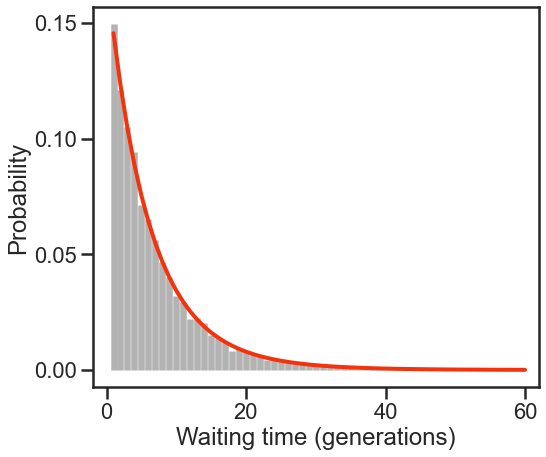

In [43]:
fig = plt.figure(figsize=(8, 7))
plt.xlim(-2, 62)
plt.xlabel('Waiting time (generations)')
plt.ylabel('Probability')
for j in x:
    plt.plot([j, j], [0, tthist[j-1]], '-', color='0.7', lw=6.5, solid_capstyle='butt')
plt.plot(x, pp, lw=4, color=sns.xkcd_rgb['vermillion'])
plt.yticks(np.arange(0, .151, .05));